<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Master_Semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

























# Hypothesis testing

# 1 sample *t* test

### Activity 1: Create a DataFrame from the data available at [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Select only the columns year, state, approval rate, SAEB note for math, SAEB note for portuguese and ideb (`ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`).

In [1]:
# importing data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ideb = pd.read_csv('/content/drive/MyDrive/ideb2.csv')

In [3]:
# selecting columns
ideb_colunas_select = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb_colunas_select

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


### Activity 2: Check how many rows and columns this DataFrame has. Check if there is missing data.

In [4]:
# checking how many rows and columns there are
ideb_colunas_select.shape

(130194, 6)

In [5]:
# checking if there is missing data and how many are missing
ideb_colunas_select.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [6]:
# droping missing data
ideb = ideb_colunas_select.dropna()
ideb.shape

(88321, 6)

### Activity 3: Test the following hypothesis: the average approval rate for the year of 2005 equals 78. Consider a confidence level of 95%.

$$H_0: \mu = 78$$
$$H_1: \mu \neq 78$$
$$α = 0,05$$

In [7]:
# selecting only the data for the year of 2005
ideb_2005 = ideb.loc[ideb['ano'] == 2005, ['taxa_aprovacao']]

In [8]:
# importing the function of one-sample t test from the package Scipy
from scipy.stats import ttest_1samp

In [9]:
# using scipy.stats.ttest_1samp to test the hypothesis
ttest_1samp(a=ideb_2005['taxa_aprovacao'], popmean=78, alternative='two-sided')

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

**Answer**: The result of the one-sample *t* test gives a p-value of 3.1469508067020596e-95, which is below 0,05. This shows strong evidence that the null hypothesis should be rejected, i.e., **the approval rate average for the year of 2005 is different from 78**.

# *t* test for two independent variables

### Activity 4: Test the following hypothesis: the average of the ideb score for the states of Rio Grande do Sul and Ceará, in 2019, are the same. Consider a confidence level of 95%.


$$H_0: \mu_1 = \mu_2$$

$$H_1: \mu_1 \neq \mu_2$$

$$α = 0,05$$

$\mu_1$ = average of Rio Grande do Sul

$\mu_2$ = average of Ceará

In [10]:
# selecting only the data from the year 2019
ideb_2019 = ideb[ideb['ano'] == 2019]
ideb_2019

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
3409,2019,AC,98.2,288.92,263.10,8.1
3410,2019,AL,99.6,306.95,281.26,8.9
3411,2019,AL,99.6,306.95,281.26,8.9
3412,2019,AL,99.6,284.67,261.05,8.1
3413,2019,AL,99.6,284.67,261.05,8.1
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


In [13]:
# selecting only the ideb scores for each state from the DataFrame created with only the data of 2019
ideb_rs = ideb_2019.loc[ideb_2019['sigla_uf'] == 'RS', ['ideb']]
ideb_ce = ideb_2019.loc[ideb_2019['sigla_uf'] == 'CE', ['ideb']]

In [14]:
# importing the function of t test ind from the package Scipy
from scipy.stats import ttest_ind

In [15]:
# using scipy.stats.ttest_ind to test the hypothesis
ttest_ind(ideb_rs, ideb_ce, equal_var=False)

Ttest_indResult(statistic=array([-3.95413028]), pvalue=array([8.67340091e-05]))

**Answer**: The result of the ind *t* test gives a p-value of 8.67340091e-05, which is below 0,05. This shows strong evidence that the null hypothesis should be rejected, i.e., **the ideb score average for Rio Grande do Sul and Ceará in 2019 are different**.

### Activity 5: Based on the previous *t* test, create a boxplot graphic and compare the graphics of both states.

In [16]:
# creating two DataFrames with the data of each state
df_RS = ideb_2019[ideb_2019['sigla_uf'] == 'RS']

df_CE = ideb_2019[ideb_2019['sigla_uf'] == 'CE']

In [17]:
# merging both DataFrames
df_final = pd.concat([df_RS, df_CE])

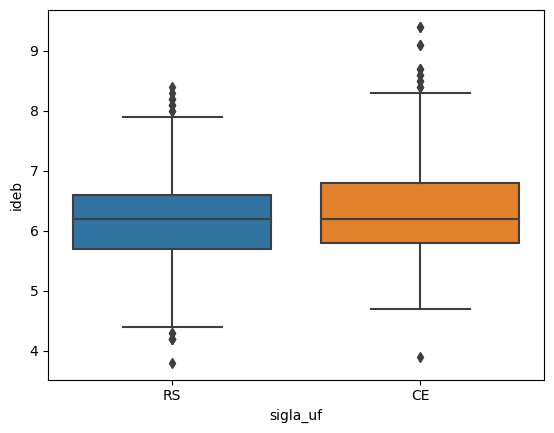

In [18]:
# importing seaborn library and creating the boxplot graphs
import seaborn as sns
sns.boxplot(x=df_final['sigla_uf'], y=df_final['ideb']);

**Answer**: The graphs show that the averages of the states are similar, but not the same. The following method shows the exact number of the means for each state, which confirms the boxplot graphs interpretation: 6.158818 for Rio Grande do Sul (RS) and 6.356836 for Ceará (CE).

In [19]:
df_RS['ideb'].describe()

count    1117.000000
mean        6.158818
std         0.728408
min         3.800000
25%         5.700000
50%         6.200000
75%         6.600000
max         8.400000
Name: ideb, dtype: float64

In [20]:
df_CE['ideb'].describe()

count    373.000000
mean       6.356836
std        0.870785
min        3.900000
25%        5.800000
50%        6.200000
75%        6.800000
max        9.400000
Name: ideb, dtype: float64

# *t* test on two related variables

### Activity 6: Test the following hypothesis:ideb scores average for the years of 2005 and 2019 are the same. Consider a confidence level of 95%.

$$H_0: \mu_1 = \mu_2$$

$$H_1: \mu_1 \neq \mu_2$$

$$α = 0,05$$

$\mu_1 = 2005$

$\mu_2 = 2019$

In [21]:
# creating one DataFrame for each year, using only the first 300 rows and droping missing data if any
df_2005 = ideb[ideb['ano'] == 2005].iloc[:300, ].dropna()
df_2019 = ideb[ideb['ano'] == 2019].iloc[:300, ].dropna()

In [22]:
# importing the function of t-test on two related variables from the package Scipy
from scipy.stats import ttest_rel

In [23]:
# using scipy.stats.ttest_rel to test the hypothesis
ttest_rel(df_2005['ideb'], df_2019['ideb'])

TtestResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295, df=299)

**Answer**: The result of the ind *t* test gives a p-value of 8.329734374233758e-295, which is below 0,05. This shows strong evidence that the null hypothesis should be rejected, i.e., **the ideb score average for 2005 and 2019 are different**.

### Activity 7: Based on the previous *t* test, create a boxplot graphic and compare the graphics of both years.

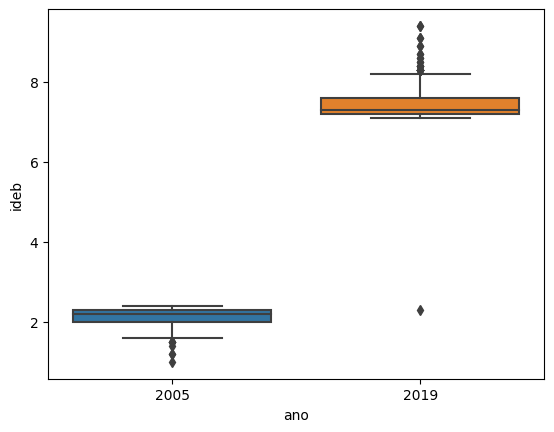

In [24]:
# merging the DataFrames of both years and creating the graph
df_final_2 = pd.concat([df_2005, df_2019])
sns.boxplot(x=df_final_2['ano'], y=df_final_2['ideb']);

**Answer**: The averages of the years of 2005 and 2019 are clearly very different.



# Analysis of Variance (ANOVA) One-Way

### Activity 8: Compare the ideb score of the three southern states in 2019, and check which ones can be considered the same. Consider a confidence level of 95%.

$$H_0: \mu_1 = \mu_2 = \mu_3$$

$$H_1: \mu_1 \neq \mu_2 = \mu_3$$
$$...$$
$$α = 0,05$$

In [25]:
# creating three DataFrames for each state
df_PR = ideb_2019[ideb_2019['sigla_uf'] == 'PR']
df_SC = ideb_2019[ideb_2019['sigla_uf'] == 'SC']
df_RS = ideb_2019[ideb_2019['sigla_uf'] == 'RS']

In [26]:
# importing the f_oneway function from the package Scipy
from scipy.stats import f_oneway

In [27]:
# using scipy.stats.f_oneway to test the hypothesis
f_oneway(df_PR['ideb'],
         df_SC['ideb'],
         df_RS['ideb'])

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

**Answer**: The result of the anova test gives a p-value of 1.2331589284254783e-12, which is below 0,05. This shows strong evidence that the null hypothesis should be rejected, i.e., **the ideb score average for at least one of the three states is different**.

### Activity 9: Create a boxplot graphic and compare the graphics of the three states.

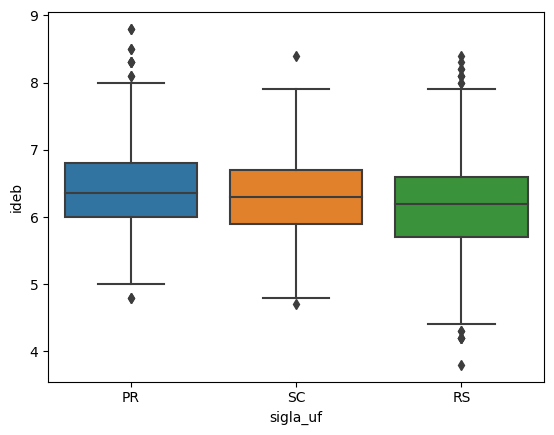

In [28]:
# merging the DataFrames of the three states and creating the graphs
df_final_3 = pd.concat([df_PR, df_SC,df_RS])
sns.boxplot(x=df_final_3['sigla_uf'], y=df_final_3['ideb']);

In [ ]:
df_PR['ideb'].describe()

count    796.000000
mean       6.388191
std        0.645905
min        4.800000
25%        6.000000
50%        6.350000
75%        6.800000
max        8.800000
Name: ideb, dtype: float64

**Answer**: The averages of the states are similar, but not the same, Paraná (PR)'s average being the highest.

In [29]:
# confirming the mean numbers
df_SC['ideb'].describe()

count    693.000000
mean       6.275902
std        0.583773
min        4.700000
25%        5.900000
50%        6.300000
75%        6.700000
max        8.400000
Name: ideb, dtype: float64

In [30]:
df_RS['ideb'].describe()

count    1117.000000
mean        6.158818
std         0.728408
min         3.800000
25%         5.700000
50%         6.200000
75%         6.600000
max         8.400000
Name: ideb, dtype: float64

### Activity 10: Perform a post-hoc test to verify if the state of Santa Catarina (SC)'s average is different from the others.

The Tukey test is a way to determine whether there is a significant difference in one of the variable's average.

In [31]:
# importing the function pairwise_tukeyhsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
# showing result of the Tukey test
print(pairwise_tukeyhsd(endog = df_final_3['ideb'],
                groups = df_final_3['sigla_uf'],
                alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------


**Answer**: The test shows that the null hypothesis of whether the averages are the same should be rejected. Thus, all the states are different.